### Q值更新公式：
$$
Q(s,a) = (1-\alpha)Q(s,a) + \alpha(r + \gamma \max_{a'}Q(s',a'))
$$

In [27]:
import numpy as np
import matplotlib.pyplot as plt

maze = [
    [0, 1, 0, 0, 0],
    [0, 1, 0, 1, 0],
    [0, 0, 0, 1, 0],
    [0, 1, 0, 0, 0],
    [0, 0, 0, 1, 2]
]

start = (0, 0)
goal = (4, 4)

alpha = 0.1
gamma = 0.9
initial_epsilon = 1 # epsilon-greedy
min_epsilon = 0.1
decay_rate = 0.01
actions = [(0, 1), (0, -1), (1, 0), (-1, 0)]

states = [(i, j) for i in range(len(maze)) for j in range(len(maze[0]))]
q_table = {(state, action): 0 for state in states for action in actions}

def get_reward(state):
    if state == goal:
        return 50
    elif maze[state[0]][state[1]] == 1:
        return -100
    else:
        return -1

def update_epsilon(episode):
    return min_epsilon + (initial_epsilon - min_epsilon) * np.exp(-decay_rate * episode)



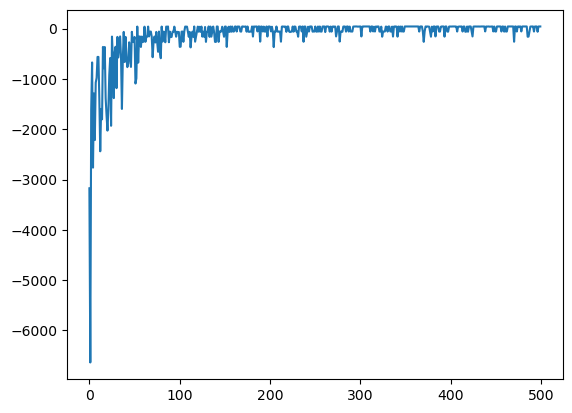

43


In [32]:
rewards = []
epsilons = []

max_episodes = 500


for episode in range(max_episodes):
    state = start
    done = False
    epsilon = update_epsilon(episode)
    total_reward = 0

    while not done:
        if np.random.rand() < epsilon:
            # action = np.random.choice(actions)
            action = actions[np.random.choice(len(actions))]
        else:
            actions_values = [q_table[(state, a)] for a in actions]
            action = actions[np.argmax(actions_values)]

        next_state = (state[0] + action[0], state[1] + action[1])
        
        if next_state[0] < 0 or next_state[0] >= len(maze) or next_state[1] < 0 or next_state[1] >= len(maze[0]):
            next_state = state
        
        reward = get_reward(next_state)
        total_reward += reward

        q_table[state, action] = (1 - alpha) * q_table[state, action] + alpha * (reward + gamma * max(q_table[next_state, a] for a in actions))

        state = next_state
        done = state == goal

    rewards.append(total_reward)
    epsilons.append(epsilon)

plt.plot(rewards)
plt.show()

结果 = rewards[-1]
打印 = print
打印(结果)